In [1]:
import numpy as np
from geometricus_deep_learning import utils, embedder
import matplotlib.pyplot as plt
import torch
from glob import glob
import pprint

%load_ext autoreload
%autoreload 2


In [2]:
import dataclasses

In [3]:
# First we define the type of moment invariants to be used in geometricus. Here I defined two, one is using 
# kmer splits and the other is using radius method to extract coordinates. Moment types for both include all
# implemented moment invariant types (16 of them)

invariant_types = [embedder.InvariantType(type=embedder.SplitType.KMER, 
                                          k=30, moment_types=None),
                   embedder.InvariantType(type=embedder.SplitType.KMER, 
                                          k=15, moment_types=None),
                   embedder.InvariantType(type=embedder.SplitType.RADIUS, 
                                          k=10, moment_types=None)]

In [4]:
# grab the pdb ids in 35%-similarity dataset from CATH.

pdb_ids = {x.split("/")[-1] for x in glob("data/cath/*")}
pdb_ids

{'3ml1A02',
 '2almA02',
 '1hy9A00',
 '4wlwA00',
 '3m2oA01',
 '3pgvA02',
 '4wb1A01',
 '4ehcA00',
 '4acoA02',
 '2y3cA00',
 '4mhvA00',
 '4f9zA02',
 '3axsA02',
 '3qsjA00',
 '1auvB02',
 '4rv9A01',
 '1kwgA03',
 '1rfmA01',
 '3c4nA01',
 '5w8mB00',
 '2dh2A01',
 '6ez3C00',
 '1sf8A00',
 '3jv1A00',
 '2p4zA00',
 '2oaaB01',
 '2nzxA02',
 '4kavA00',
 '1pdaA03',
 '5u47A01',
 '5bowA00',
 '1v31A00',
 '1di6A00',
 '1nl1A00',
 '2xotB01',
 '3k4zA01',
 '3b0bC01',
 '1mixA01',
 '3pubA02',
 '1jeyB03',
 '2ab1A00',
 '2vtfA02',
 '4l8nA03',
 '2g7lA00',
 '3hlkA02',
 '1i2hA00',
 '1knvB00',
 '3q6kA00',
 '1v6eA01',
 '1cczA01',
 '3f0cA02',
 '1g1xB00',
 '3ns4A00',
 '4nn2B00',
 '3ll7A02',
 '1gqgC02',
 '3fzvA03',
 '4ip8A00',
 '3ifsA02',
 '3d8bB02',
 '2yo2A02',
 '2c2nA02',
 '3sp1A02',
 '2csuA02',
 '3ep6B01',
 '2qj6A01',
 '2hnlA02',
 '2d0bA01',
 '1vd6A00',
 '4k3cA02',
 '2cb0A02',
 '4c9bB00',
 '3qkaE02',
 '3pfsB00',
 '1hk5A03',
 '1wkrA02',
 '6a95B00',
 '3kypE01',
 '4hrvA00',
 '4q7aA02',
 '3cddA01',
 '3lb6D01',
 '2cazE00',
 '2o

In [12]:
# Extract all the class data regarding CATH and map them to the domain ids (same as the above pdb ids).
# we use the pdb_ids to filter out unwanted mappings.

domain_info = utils.DomainInfo.from_domainlist_file("./data/cath-domain-list-S100.txt").domains
cath_mapping = {k: f"{v.c_class}-{v.architecture}-{v.topology}" for k, v in domain_info.items() if k in pdb_ids}
keys, counts = np.unique(list(cath_mapping.values()), return_counts=True)
least_allowed_class_count = 20
keys_to_use = {x for x in keys[np.where(counts >= least_allowed_class_count)[0]]}
cath_mapping = {k: v for k, v in cath_mapping.items() if v in keys_to_use}
print(f'number of classes (more than {least_allowed_class_count} domains): {len(keys_to_use)}\nnumber of domains: {len(cath_mapping)}')

number of classes (more than 20 domains): 116
number of domains: 10971


In [15]:
# !mkdir ./models/debug_model

In [ ]:
# Create and train the model.. this takes some time

emb = embedder.GeometricusGraphEmbedder.fit("./data/cath/", invariant_types, cath_mapping,
                                            epochs=2_000, file_output_path="./models/cath_model/",
                                            learning_rate=0.0002, number_of_batches=512,
                                            hidden_channels=128)

In [12]:
emb = embedder.GeometricusGraphEmbedder.from_model_meta_file("./models/cath_model/meta.pkl")

In [9]:
torch.cuda.empty_cache() # this forces garbage collection

In [7]:
# Some info on training data

dataclasses.asdict(emb.model_meta)

{'model_path': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/model.pth',
 'umap_transformer_path': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/umap.pkl',
 'pdb_folder': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/data/cath',
 'self_path': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/meta.pkl',
 'classes_to_ids': None,
 'invariant_types': [{'type': <SplitType.KMER: 1>,
   'k': 30,
   'moment_types': None},
  {'type': <SplitType.RADIUS: 2>, 'k': 10, 'moment_types': None}],
 'train_acc': 0.7717299578059071,
 'test_acc': 0.6316085489313836,
 'original_invariants_file': '/mnt/backup2/geometric_deep_learning/geometricus_deep_learning/models/cath_model/invariants.pkl'}

{'1BOZ_A_4.pdb': 41,
 '1BZF_A_3.pdb': 41,
 '1TSL_A_5.pdb': 41,
 '2LE9_B_9.pdb': 1,
 '2M0R_A_19.pdb': 1,
 '2ZJR_K_20.pdb': 41,
 '3D0Y_B_3.pdb': 12,
 '3F0V_X_2.pdb': 41,
 '3F8Z_A_4.pdb': 41,
 '3JCM_H_856.pdb': 41,
 '3QLZ_A_8.pdb': 41,
 '3S7N_A_153.pdb': 21,
 '4IOA_K_20.pdb': 41,
 '4PTH_A_1.pdb': 41,
 '4UFY_A_963.pdb': 41,
 '5ADT_A_963.pdb': 41,
 '5AL1_A_963.pdb': 41,
 '5IST_X_2.pdb': 41,
 '5KPO_A_808.pdb': 22,
 '5LLY_A_147.pdb': 18}


(<matplotlib.image.AxesImage at 0x7efd2d927460>, None)

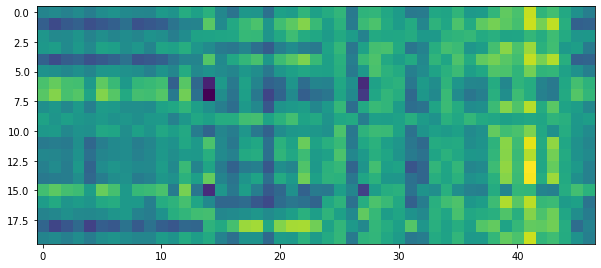

In [8]:
# Here we can classify some pdbs and visualize embeddings
plt.figure(figsize=(10,5))
test_embedding, ids, classification = emb.pdbs_to_raw_embedding("data/some_pfam_pdbs/")
plt.imshow(test_embedding[:20]), pprint.pprint({ids[i]: classification[i] for i in range(len(ids[:20]))})

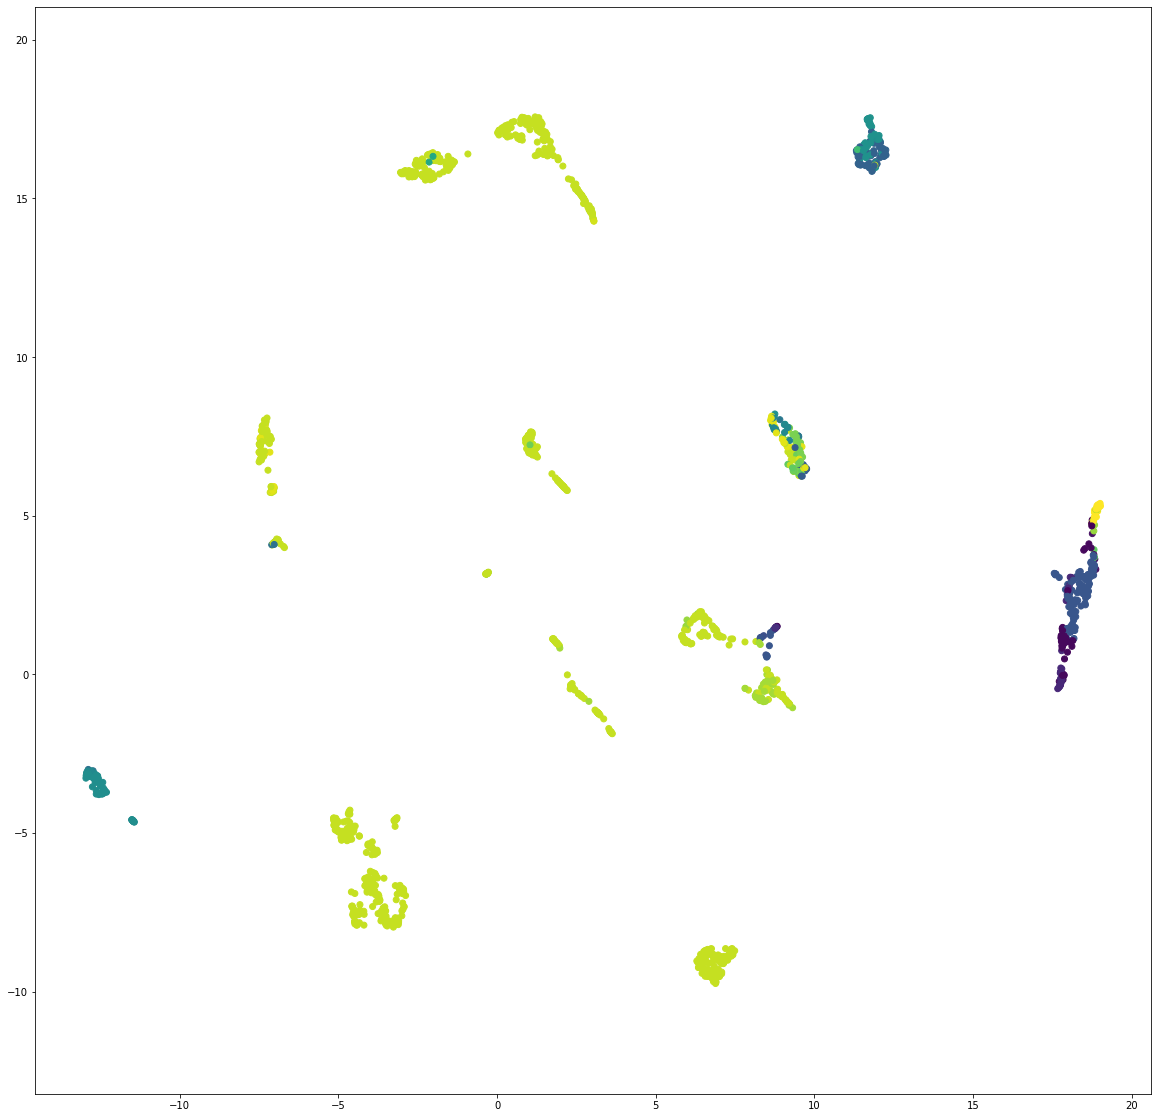

In [10]:
# we could also plot the embeddings coloured by predicted classes
from umap import UMAP

umap_embedding = UMAP(n_components=2).fit_transform(test_embedding)
plt.figure(figsize=(20,20))
plt.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    c=classification)
plt.gca().set_aspect('equal', 'datalim')